# COMP 7150 Assignment 7

Due: April 25, 2023 before midnight.

YOUR_NAME:

---

**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

---

#### Dataset: insurance_costs.csv

This dataset consists of 6 features and 1 target variable ("charges").  Each row is an insurance customer.  

The features are about the gender, age, bmi, the number of children, whether the customer smokes, and where the customer lives.

The "charges" is how much each customer had to pay.

In [1]:
import pandas as pd
insurance=pd.read_csv('./../Sem_2/insurance_assignment/insurance_costs.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


---

Each problem is worth 15 points.  In total, there are a maximum of 20 bonus points for this assignment.



---
**Problem 1**

Among the numerical features, which one is most likely normally distributed?  Explain your answer using numerical analyses (test for normality; see Notebook 6) and visually (looking at distributions).


<Axes: xlabel='charges', ylabel='Density'>

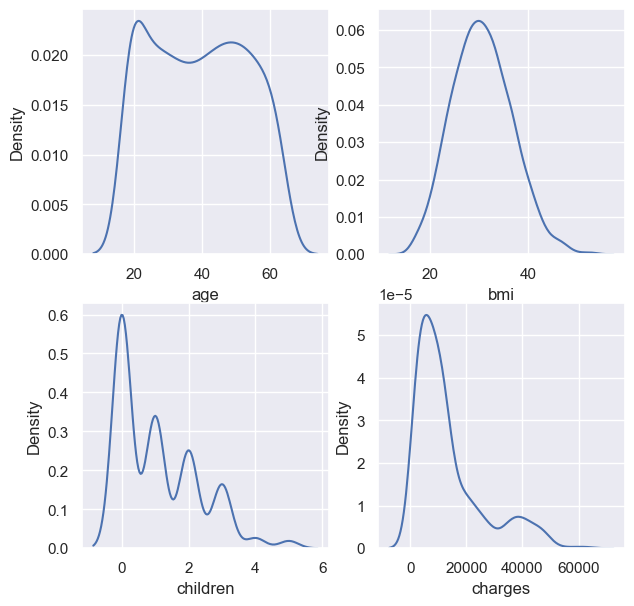

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig,ax=plt.subplots(2,2)
fig.set_size_inches(7,7)
sns.kdeplot(data=insurance,x='age',ax=ax[0,0])
sns.kdeplot(data=insurance,x='bmi',ax=ax[0,1])
sns.kdeplot(data=insurance,x='children',ax=ax[1,0])
sns.kdeplot(data=insurance,x='charges',ax=ax[1,1])


In [3]:
from scipy.stats import shapiro
normality=pd.DataFrame()
cols=['age','bmi','children','charges']
score=[]
p_value=[]

for i in cols:
    sc,p_val=shapiro(insurance[i])
    score.append(sc)
    p_value.append(p_val)

normality['feature']=cols
normality['score']=score
normality['p_value']=p_value
normality['isNormal']=normality['p_value'].apply(lambda x: 'No' if x<0.05 else 'Yes')

normality

,feature,score,p_value,isNormal
0,age,0.944699,5.687060e-22,No
1,bmi,0.993886,2.603341e-05,No
2,children,0.823181,5.066907e-36,No
3,charges,0.814688,1.150519e-36,No


---
**Problem 2**

Which region is least healthy?  Explain your answer using both numerical analyses and visual analyses.


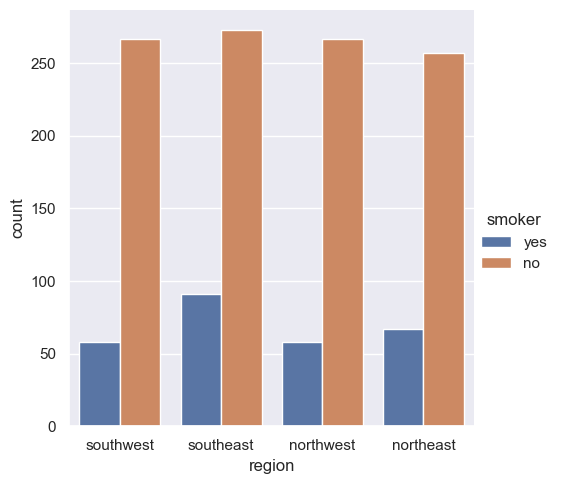

In [4]:
sns.catplot(kind='count',data=insurance,x='region',hue='smoker')

Southeast region is least healthy as there are more number of smokers than any other region

---
**Problem 3**

Between bmi and age, which feature is more linearly related to charges?  Explain your answer by providing a visual analysis.


<Axes: >

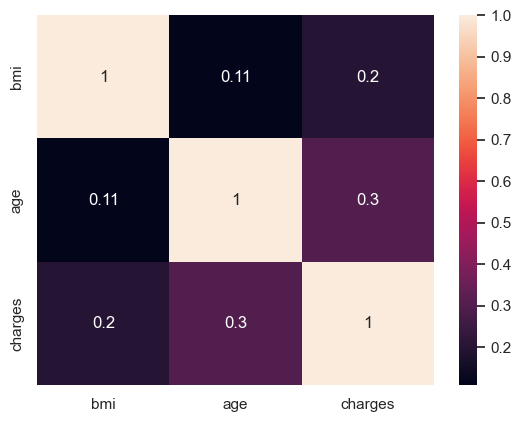

In [5]:
sns.heatmap(insurance[['bmi','age','charges']].corr(),annot=True)


Both bmi and age are not highly correlated. Among these age is slightly better in terms of linear relation with charges in comaparison to bmi.

---
**Problem 4**

Between bmi and age, which feature is more linearly related to charges? Explain your answer using linear models.


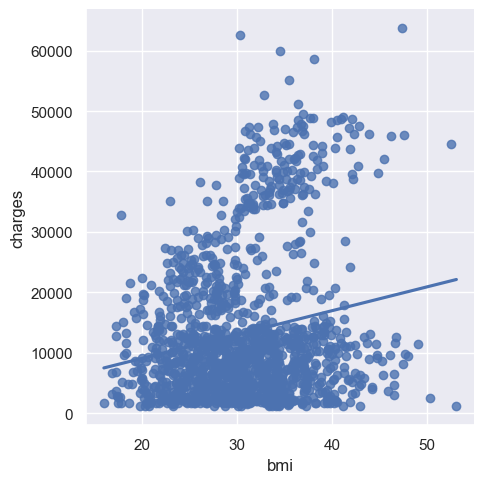

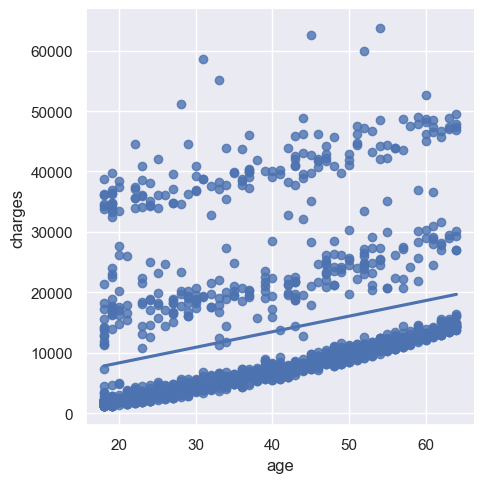

In [6]:

sns.lmplot(data=insurance,y='charges',x='bmi',ci=None)
sns.lmplot(data=insurance,y='charges',x='age',ci=None)


---
**Problem 5**

What is an appropriate scoring metric and cross validation method to measure the performance of a regression model?


For a regression model R-squared is the appropriate scoring metric along with mean squared error. 
KFold cross validation is better.

---
**Problem 6**

Evaluate the performance of Linear Regression on predicting insurance "charges". You should use all features to build your model.  Note that some features are categorical, which must be converted to numerical features first (see Notebook 12).  


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

insurance_dummies=pd.get_dummies(insurance,drop_first=True)
scaler=StandardScaler()
kfold=KFold(n_splits=10,random_state=69,shuffle=True)

features=insurance_dummies.drop('charges',axis=1)
target=insurance_dummies['charges']

features_scaled=scaler.fit_transform(features)

X_train,X_test,y_train,y_test=train_test_split(features_scaled,target,random_state=57)

reg=LinearRegression()

cv=cross_val_score(reg,X_train,y_train,cv=kfold,n_jobs=-1)

cv_mse=cross_val_score(reg,X_train,y_train,cv=kfold,n_jobs=-1,scoring='neg_mean_squared_error')

print(f'R squared value of the regression model is {cv.mean()}')

print(f'Mean Squared error of the regression model is {-cv_mse.mean()}')




R squared value of the regression model is 0.7325627447506179
Mean Squared error of the regression model is 37708108.39129625


---
**Problem 7**

Evaluate the performance of the non-linear method Decision Tree Regressor. You should use all features to build your model.  Vary the parameters, e.g. max_depth, min_samples_leaf, to improve the performance of the model.


In [8]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

params={'max_depth':np.arange(1,30,10),
       'min_samples_leaf':np.arange(1,20,3)}

decision=DecisionTreeRegressor()

decision_cv=GridSearchCV(decision,cv=kfold,param_grid=params)

decision_cv.fit(X_train,y_train)

y_pred=decision_cv.predict(X_test)

print(f'Best Parameters of Decision Tree regression model is {decision_cv.best_params_}')
print(f'R squared value of the Decision Tree regression model is {decision_cv.best_score_}')

decision_test=pd.DataFrame()
decision_test['Actual']=y_test
decision_test['Predicted']=y_pred
decision_test

Best Parameters of Decision Tree regression model is {'max_depth': 11, 'min_samples_leaf': 16}
R squared value of the Decision Tree regression model is 0.8281982045060697


,Actual,Predicted
838,6402.29135,10216.651201
411,19594.80965,23079.486884
141,3490.54910,8452.332410
564,2801.25880,6027.143639
1102,3471.40960,5554.498536
...,...,...
359,1607.51010,1830.753200
227,24227.33724,13988.467369
80,4441.21315,4058.420613
1032,4137.52270,2853.104495


---
**Problem 8**

Evaluate the performance of the non-linear method Random Forest Regressor. You should use all features to build your model.  Vary the parameters, e.g. max_depth, min_samples_leaf, to improve the performance of the model.

In [9]:
from sklearn.ensemble import RandomForestRegressor

params_forest={'max_depth':np.arange(1,30,10),
       'min_samples_leaf':np.arange(1,20,3),
              }
'''
'n_estimators':[100,250,300,450,600],
'max_features':['log2','sqrt']
'''

random=RandomForestRegressor(random_state=186)

random_cv=GridSearchCV(estimator=random,cv=kfold,n_jobs=-1,param_grid=params_forest)

random_cv.fit(X_train,y_train)

y_pred=random_cv.predict(X_test)

print(f'Best Parameters of Random Forest regression model is {random_cv.best_params_}')
print(f'R squared value of the Random Forest regression model is {random_cv.best_score_}')

random_test=pd.DataFrame()
random_test['Actual']=y_test
random_test['Predicted']=y_pred
random_test

Best Parameters of Random Forest regression model is {'max_depth': 11, 'min_samples_leaf': 16}
R squared value of the Random Forest regression model is 0.8443078027380204


,Actual,Predicted
838,6402.29135,7808.032273
411,19594.80965,25294.797338
141,3490.54910,6706.376035
564,2801.25880,7268.053279
1102,3471.40960,5949.352960
...,...,...
359,1607.51010,2870.955479
227,24227.33724,13916.080556
80,4441.21315,5069.182314
1032,4137.52270,4091.462329
